# 日経平均株価 日足

In [27]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import yfinance as yf

symbol = '^N225'
ticker = yf.Ticker(symbol)

df = ticker.history(period='1y')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-29 00:00:00+09:00,35814.289062,36186.871094,35813.769531,36026.941406,95500000,0.0,0.0
2024-01-30 00:00:00+09:00,36196.640625,36249.031250,36039.308594,36065.859375,87900000,0.0,0.0
2024-01-31 00:00:00+09:00,35747.890625,36292.531250,35704.578125,36286.710938,111100000,0.0,0.0
2024-02-01 00:00:00+09:00,36008.558594,36146.359375,35924.601562,36011.460938,118100000,0.0,0.0
2024-02-02 00:00:00+09:00,36249.988281,36441.089844,36083.609375,36158.019531,114800000,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-21 00:00:00+09:00,39163.531250,39238.210938,38643.839844,39027.980469,93300000,0.0,0.0
2025-01-22 00:00:00+09:00,39355.218750,39694.570312,39332.628906,39646.250000,108500000,0.0,0.0
2025-01-23 00:00:00+09:00,39810.058594,40036.070312,39677.218750,39958.871094,119100000,0.0,0.0


In [40]:
df0 = ticker.history(period='2y')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-27 00:00:00+09:00,27428.410156,27452.669922,27326.910156,27382.560547,71500000,0.0,0.0
2023-01-30 00:00:00+09:00,27384.769531,27486.419922,27337.250000,27433.400391,65800000,0.0,0.0
2023-01-31 00:00:00+09:00,27458.560547,27494.169922,27302.220703,27327.109375,74600000,0.0,0.0
2023-02-01 00:00:00+09:00,27483.410156,27547.669922,27322.789062,27346.880859,65800000,0.0,0.0
2023-02-02 00:00:00+09:00,27453.669922,27472.439453,27338.429688,27402.050781,73200000,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-21 00:00:00+09:00,39163.531250,39238.210938,38643.839844,39027.980469,93300000,0.0,0.0
2025-01-22 00:00:00+09:00,39355.218750,39694.570312,39332.628906,39646.250000,108500000,0.0,0.0
2025-01-23 00:00:00+09:00,39810.058594,40036.070312,39677.218750,39958.871094,119100000,0.0,0.0


## 日足チャートと Bollinger's bands

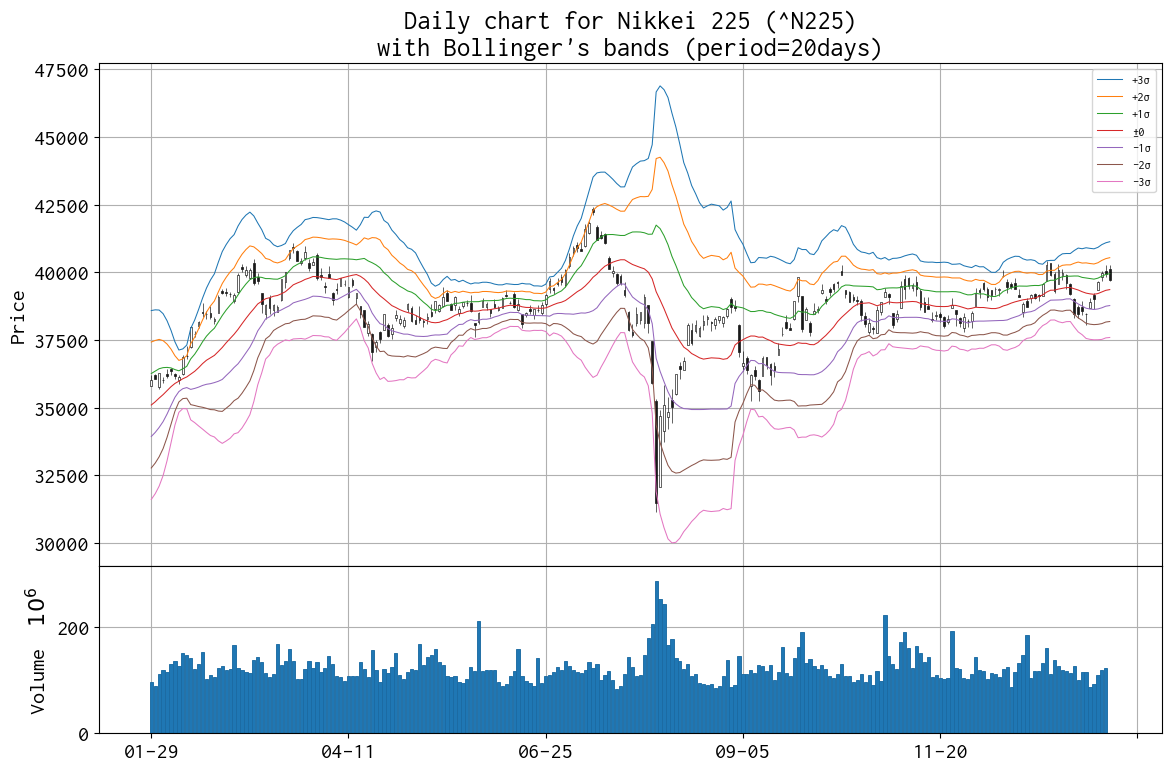

In [41]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

# Bollinger bands
period = 20
r = df0['Close'].rolling(period)    
band_upper3 = r.mean() + 3 * r.std()
band_upper2 = r.mean() + 2 * r.std()
band_upper1 = r.mean() + 1 * r.std()
band_mean = r.mean()
band_lower1 = r.mean() - 1 * r.std()
band_lower2 = r.mean() - 2 * r.std()
band_lower3 = r.mean() - 3 * r.std()

apds  = [
    mpf.make_addplot(band_upper3[df.index], width=0.75, label='+3σ', ax=ax[0]),
    mpf.make_addplot(band_upper2[df.index], width=0.75, label='+2σ', ax=ax[0]),
    mpf.make_addplot(band_upper1[df.index], width=0.75, label='+1σ', ax=ax[0]),
    mpf.make_addplot(band_mean[df.index], width=0.75, label='±0', ax=ax[0]),
    mpf.make_addplot(band_lower1[df.index], width=0.75, label='-1σ', ax=ax[0]),
    mpf.make_addplot(band_lower2[df.index], width=0.75, label='-2σ', ax=ax[0]),
    mpf.make_addplot(band_lower3[df.index], width=0.75, label='-3σ', ax=ax[0]),
]   

mpf.plot(
    df,
    type='candle',
    style='default',
    volume=ax[1],
    datetime_format='%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax[0],
)

try:
    ax[0].set_title('Daily chart for %s (%s)\nwith Bollinger\'s bands (period=20days)' % (ticker.info['longName'], symbol))
except KeyError:
    ax[0].set_title('Daily chart for %s\nwith Bollinger\'s bands (period=20days)' % symbol)

ax[0].legend(loc='best', fontsize=9)

plt.tight_layout()
plt.savefig('daily_chart_bollinger_n225.png')
plt.show()

In [30]:
df.tail(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-01-27 00:00:00+09:00,40127.738281,40255.679688,39679.921875,39699.761719,0,0.0,0.0


In [31]:
df.tail(2)['Close']

Date
2025-01-24 00:00:00+09:00    39931.980469
2025-01-27 00:00:00+09:00    39699.761719
Name: Close, dtype: float64

In [32]:
df.tail(2)['Close'].diff()

Date
2025-01-24 00:00:00+09:00          NaN
2025-01-27 00:00:00+09:00   -232.21875
Name: Close, dtype: float64

In [33]:
df['Close'].rolling(25).mean()

Date
2024-01-29 00:00:00+09:00             NaN
2024-01-30 00:00:00+09:00             NaN
2024-01-31 00:00:00+09:00             NaN
2024-02-01 00:00:00+09:00             NaN
2024-02-02 00:00:00+09:00             NaN
                                 ...     
2025-01-21 00:00:00+09:00    39248.954688
2025-01-22 00:00:00+09:00    39259.915469
2025-01-23 00:00:00+09:00    39264.304688
2025-01-24 00:00:00+09:00    39282.766250
2025-01-27 00:00:00+09:00    39292.457187
Name: Close, Length: 244, dtype: float64

In [34]:
df['Close'].rolling(75).mean()

Date
2024-01-29 00:00:00+09:00             NaN
2024-01-30 00:00:00+09:00             NaN
2024-01-31 00:00:00+09:00             NaN
2024-02-01 00:00:00+09:00             NaN
2024-02-02 00:00:00+09:00             NaN
                                 ...     
2025-01-21 00:00:00+09:00    38942.302708
2025-01-22 00:00:00+09:00    38965.325365
2025-01-23 00:00:00+09:00    38982.750729
2025-01-24 00:00:00+09:00    39011.060312
2025-01-27 00:00:00+09:00    39026.363021
Name: Close, Length: 244, dtype: float64

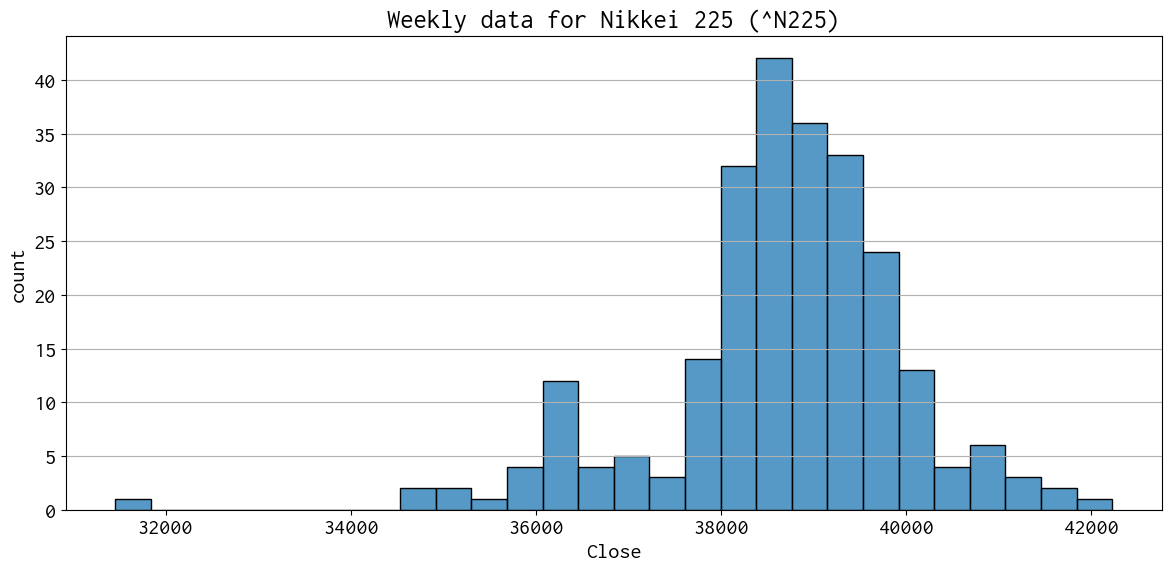

In [35]:
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

ax = sns.histplot(
  data = df,
  x = "Close"
)
ax.set_xlabel("Close")
ax.set_ylabel("count")
ax.set_title('Weekly data for %s (%s)' % (ticker.info['longName'], symbol))
ax.grid(axis = 'y')

plt.tight_layout()
plt.savefig('daily_histogram_n225.png')
plt.show()

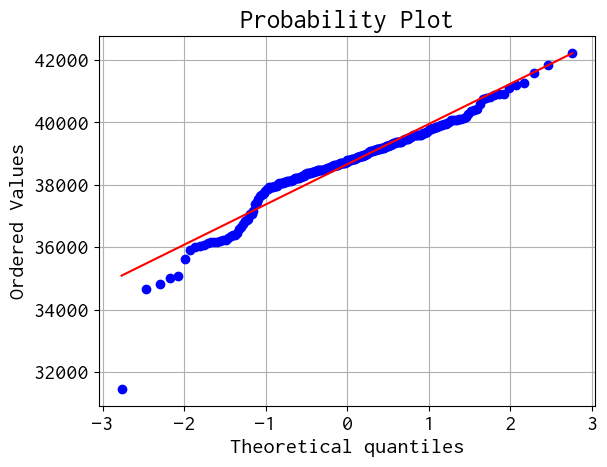

In [36]:
# Q-Qプロットの描画
stats.probplot(df['Close'], dist="norm", plot=plt)
plt.grid()
plt.show()

In [37]:
len(df)

244

In [38]:
W, shapiro_p_value = stats.shapiro(df['Close'])
print(f'Shapiro-Wilk test statistic: {W}, p-value: {shapiro_p_value}')

Shapiro-Wilk test statistic: 0.9324177187847223, p-value: 3.868699770374816e-09


In [39]:
stats.anderson(df['Close'])

AndersonResult(statistic=np.float64(4.559127641424823), critical_values=array([0.567, 0.646, 0.775, 0.904, 1.075]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(38652.766065253585), scale=np.float64(1328.1851708248548))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')